# Checkpoint 11

#### Determing the momentum resolution for muon tracks at LHCb with NN Regression

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Exercise 1

Import the data file and read it as a pandas dataframe.

__Variable Descriptions__  
ep | estimate of relative muon track fit momentum error ($\frac{σp}{p}$)  

eta | muon track η  

p | muon track momentum magnitude in GeV/c ($p$ ≡ $\sqrt{p_x^2 + p_y^2 + p_z^2}$)  

phi | muon track ϕ in rad  

pol | magnet polarity (+ or −)  

pt | muon track transverse momentum in GeV/c ($p_T$ ≡ $\sqrt{p_x^2 + p_y^2}$)  

qp | muon charge × momentum in GeV/c  

tx | ratio of x- to z-momentum components of muon track ($\frac{p_x}{p_z}$)  

ty | ratio of y- to z-momentum components of muon track ($\frac{p_y}{p_z}$)  

zV | z-component of χc1 decay vertex in mm

In [2]:
muon_df = pd.read_csv("mc-chic1.csv", index_col=0)

muon_df.head()

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373


Do a sanity check of the dataset: Is the definition for all variables clear? Do all variables have the same number of entries? Are there any null values that need to be discarded?

In [3]:
# checking to see if all variables have the same number of entries
muon_df.tail()

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
208979,0.007196,4.140301,7.805385,0.284841,-1.0,0.248430,-7.805385,0.030561,0.008948,-10.3122
208980,0.007210,3.852298,160.216980,2.341455,-1.0,6.800037,160.216980,-0.029593,0.030478,-47.0282
208981,0.004592,4.234431,32.691210,1.112678,-1.0,0.947065,-32.691210,0.012818,0.025994,-47.0282
208982,0.003816,4.122482,14.349394,2.564155,-1.0,0.464920,14.349394,-0.027161,0.017696,-47.0282
208983,0.004138,4.130126,12.054873,2.654359,-1.0,0.387605,-12.054873,-0.028426,0.015061,-47.0282


In [4]:
# checking for null values
null_vals = muon_df.isnull()
count = 0

for column, value in null_vals.items():
    if value is True:
        count += 1

print("There are ", count, "null values in the dataframe")

There are  0 null values in the dataframe


Reproduce the scatter plot of Fig. 1. Make sure to zoom in the plot in a way that allows you to see clearly the different momentum resolution bands.

In [6]:
%matplotlib widget

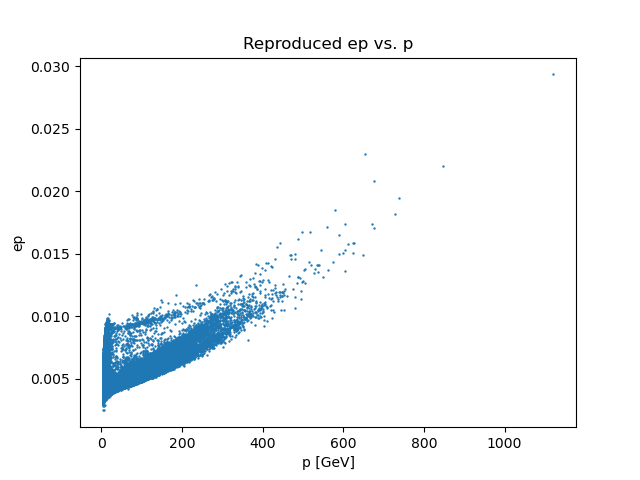

In [7]:
# Plotting Fig. 1
# y axis: delta p / p (momentum resolution)
# x axis: p (muon momentum)

plt.figure()
plt.scatter(x=muon_df['p'], y=muon_df['ep'], s=0.5)
plt.title("Reproduced ep vs. p")
plt.xlabel("p [GeV]")
plt.ylabel("ep")
plt.show()

In the above figure, zoom in to axis scales p: [0, 400] and ep: [0.002, 0.012] using the widget features.

## Exercise 2  

Demonstrate that $p_T$ ≪ $p_z$ in two ways:  

- Plot the 1D distributions for $p$ and $p_T$ in log scale.
- Use the “data-appending” method (pandas.DataFrame.append) to add the variables $p_z$ (i.e. $p_z$ ≡ $\sqrt{p^2 - p_T^2}$) and $ep_z$ ($ep_z$ = $ep * \frac{p}{p_z}$, i.e. effectively $\frac{\sigma_{p_z}}{p_z}$) in the DataFrame object. Create the $\frac{\sigma_{p_z}}{p_z}$ vs. $p_z$ scatter plot and demonstrate that it is qualitatively identical to Fig. 1.

Hint #2: It is good practice to make a copy of the DataFrame object before appending data (in case something goes wrong).

Hint #3: You may want to use method pandas.DataFrame.iterrows in your data appending operation.

In [8]:
import seaborn as sns

_Plotting 1D log scale distributions for $p$ and $p_T$_

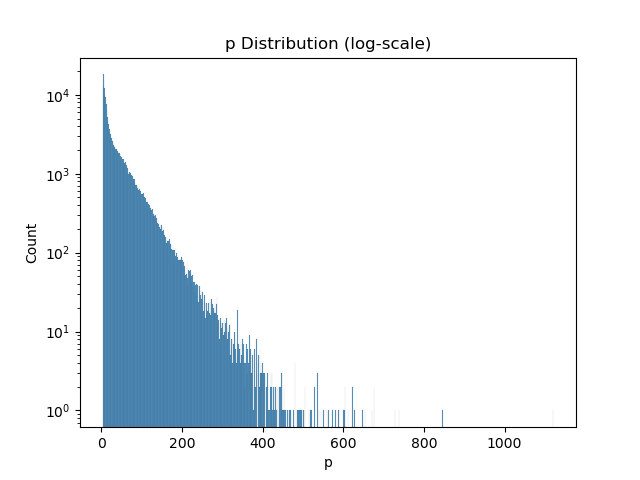

In [9]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
sns.histplot(data=muon_df['p'])
plt.title("p Distribution (log-scale)")
ax2.set_yscale('log')
plt.show()

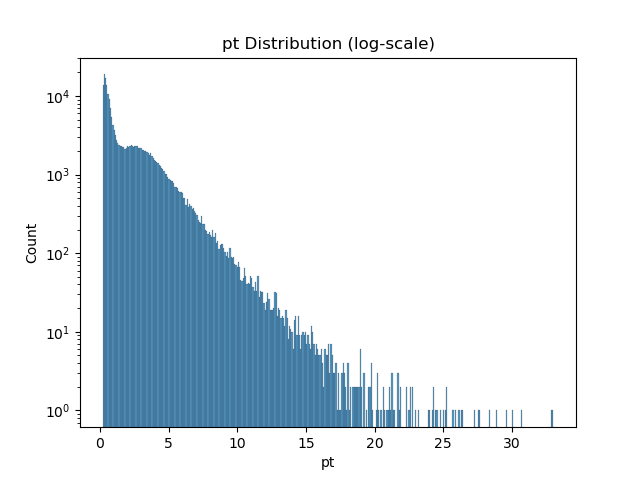

In [10]:
fig3 = plt.figure()
ax3 = fig3.add_subplot()
sns.histplot(data=muon_df['pt'])
plt.title("pt Distribution (log-scale)")
ax3.set_yscale('log')
plt.show()

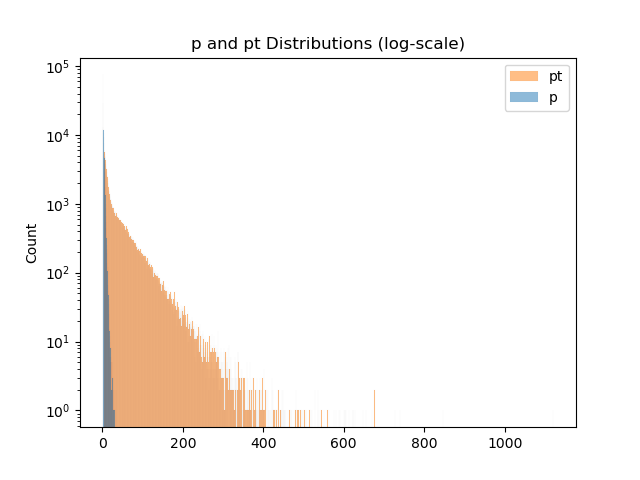

In [11]:
fig4 = plt.figure()
ax4 = fig4.add_subplot()
sns.histplot(data=[muon_df['pt'],muon_df['p']])
plt.title("p and pt Distributions (log-scale)")
ax4.set_yscale('log')
plt.legend(['pt','p'])
plt.show()

_Data appending method_

In [12]:
# make a copy of the original dataframe
copy_muon_df = pd.DataFrame(muon_df)
copy_muon_df.head()

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373


In [13]:
# calculating pz and epz
pz_data = np.sqrt(muon_df['p']**2 + muon_df['pt']**2)
pz = pd.Series(data=pz_data, name='pz')

epz_data = muon_df['ep']*muon_df['p']/pz
epz = pd.Series(data=epz_data, name='epz')

In [14]:
# appending pz and epz to the dataframe using concat() (according to the pandas documentation, append() is deprecated)
copy_muon_df = pd.concat([copy_muon_df, pz, epz], axis=1)
copy_muon_df.head()

,ep,eta,p,phi,pol,pt,qp,tx,ty,zV,pz,epz
0,0.005459,3.210803,72.079880,0.294754,1.0,5.803692,72.079880,0.077296,0.023467,-60.3975,72.313152,0.005441
1,0.004050,4.436362,37.638340,-0.088796,1.0,0.891071,-37.638340,0.023588,-0.002100,-60.3975,37.648886,0.004049
2,0.003901,3.577396,18.565832,0.319936,1.0,1.036960,18.565832,0.053102,0.017594,-60.3975,18.594768,0.003895
3,0.003859,3.532860,8.632520,0.219504,1.0,0.504075,-8.632520,0.057089,0.012736,-60.3975,8.647225,0.003853
4,0.004975,3.300828,43.359665,-0.720869,1.0,3.191501,43.359665,0.055445,-0.048714,-8.0373,43.476962,0.004962


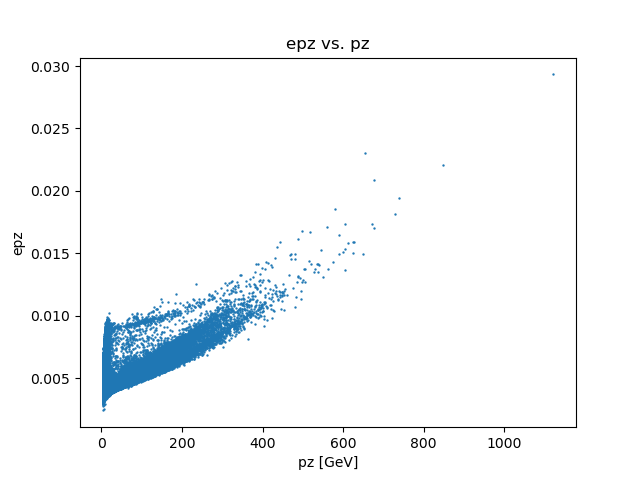

In [15]:
plt.figure()
plt.scatter(x=copy_muon_df['pz'], y=copy_muon_df['epz'], s=0.5)
plt.title("epz vs. pz")
plt.xlabel("pz [GeV]")
plt.ylabel("epz")
plt.show()

The epz vs. pz graph is qualitatively identical to the ep vs. p figure I reproduced in exercise 1. The scales on both axes are similar, and both figures show three 'lines' of various slopes.

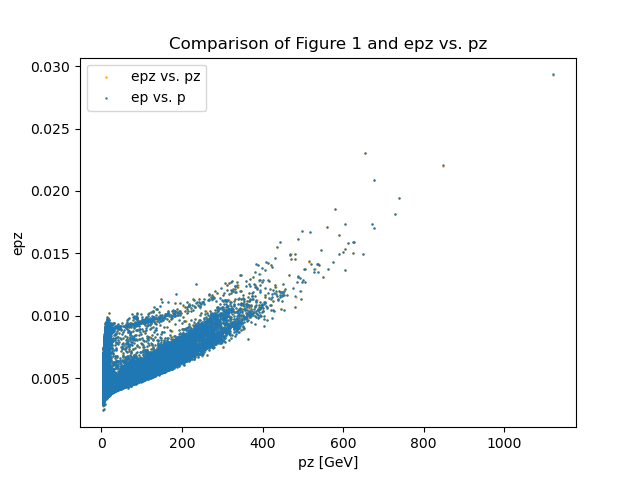

In [16]:
# Here's a graph overlaying the ep vs. p and epz vs. pz plots
plt.figure()
plt.scatter(x=copy_muon_df['pz'], y=copy_muon_df['epz'], s=0.5, c='orange')
plt.scatter(x=muon_df['p'], y=muon_df['ep'], s=0.5)
plt.title("Comparison of Figure 1 and epz vs. pz")
plt.xlabel("pz [GeV]")
plt.ylabel("epz")
plt.legend(['epz vs. pz', 'ep vs. p'])
plt.show()

This plot clearly shows that there is very little difference between the original plot and the z-component plot.

## Exercise 3

Define a simple single-layer Keras model in a function that uses the same number of nodes as the number of inputs (5).

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import models

In [18]:
# 5 inputs: p, tx , ty , eta , phi; 1 output: (ep)
num_inputs = 5
num_outputs = 1

# simple Keras model : use same # of nodes as # of inputs in a single layer
num_nodes = num_inputs

In [24]:
def simple_model():
    # create model
    model = Sequential()
    # no activation required for the output, as this is a regression problem,
    # ie. we need a numerical prediction for any input and use 'relu'
    model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer='normal', \
                    activation='relu'))
    # take out 20% of data points to avoid overfitting
    model.add(Dropout (0.2))
    model.add(Dense(num_outputs, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer ='adam')
    return model

In [21]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [62]:
N_epochs = 5
batchSize = 100

data_cols = muon_df[['p', 'tx', 'ty', 'eta', 'phi']]
target_col = muon_df['ep']

In [71]:
# must always set the random seed for reproducibility
Answer_to_everything = 42
np.random.seed (Answer_to_everything)
estimator = KerasRegressor(build_fn=simple_model, epochs=N_epochs, batch_size=batchSize)
kfold = KFold(n_splits=10, random_state=Answer_to_everything, shuffle=True)

# data and target are 5- column and 1- column arrays produced with pandas.DataFrame.values
results = cross_val_score(estimator, X=data_cols, y=target_col, cv=kfold, scoring ='r2')

C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


Epoch 1/5
1881/1881 [==============================] - 8s 4ms/step - loss: 1.5903e-06
Epoch 2/5
1881/1881 [==============================] - 7s 4ms/step - loss: 8.2086e-07
Epoch 3/5
1881/1881 [==============================] - 7s 4ms/step - loss: 8.0173e-07
Epoch 4/5
1881/1881 [==============================] - 7s 4ms/step - loss: 8.1035e-07
Epoch 5/5
209/209 [==============================] - 1s 3ms/step
Epoch 1/5
1881/1881 [==============================] - 8s 4ms/step - loss: 4.7569e-04
Epoch 2/5
1881/1881 [==============================] - 7s 4ms/step - loss: 7.9239e-07
Epoch 3/5
1881/1881 [==============================] - 7s 4ms/step - loss: 5.3843e-07
Epoch 4/5
1881/1881 [==============================] - 7s 4ms/step - loss: 5.3648e-07
Epoch 5/5
209/209 [==============================] - 1s 3ms/step
Epoch 1/5
1881/1881 [==============================] - 9s 4ms/step - loss: 3.6324e-04
Epoch 2/5
1881/1881 [==============================] - 7s 4ms/step - loss: 4.8413e-07
Epoch 3/5


In [72]:
print("Standardised: %.2 f %s %.2f", results.mean(), u'\u00B1 ', results.std())

Standardised: %.2 f %s %.2f 0.5434719231782628 ±  0.1784679600270542


R2 Scores:  
_N\_epochs, batch size, R2 mean, R2 std_

- 3, 100, 0.547, 0.209
- 5, 100, 0.598, 0.145
- 3, 50, 0.596, 0.052
- 10, 1000, 0.588, 0.145
- 7, 250, 0.565, 0.133
- 20, 1000, 0.527, 0.195

Higher values of R2 are more desirable, so the best result from the range I've tried is 5 epochs with a batch size of 100.

## Exercise 4

(a) In the code of the previous example, we will be replacing the estimator created via the KerasRegressor call by a new “pipelined” estimator using the sklearn.pipeline.Pipeline method.

The rest of the code remains the same. Evaluate the performance of the new estimator with standardised inputs. How does it perform compared to the previous example?

In [70]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=simple_model, \
                                         epochs=N_epochs, batch_size=batchSize)))
pipeline = Pipeline(estimators)

results = cross_val_score(pipeline, X=data_cols, y=target_col, cv=kfold, scoring ='r2')
print("Standardised: %.2 f %s %.2f", results.mean(), u"\u00B1 ", results.std())

C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


Epoch 1/5
1881/1881 [==============================] - 8s 3ms/step - loss: 6.8872e-07
Epoch 2/5
1881/1881 [==============================] - 7s 4ms/step - loss: 4.0447e-07
Epoch 3/5
1881/1881 [==============================] - 7s 3ms/step - loss: 3.9749e-07
Epoch 4/5
1881/1881 [==============================] - 7s 4ms/step - loss: 4.0166e-07
Epoch 5/5
209/209 [==============================] - 1s 3ms/step
Epoch 1/5
1881/1881 [==============================] - 8s 4ms/step - loss: 4.1305e-06
Epoch 2/5
1881/1881 [==============================] - 7s 3ms/step - loss: 4.1422e-07
Epoch 3/5
1881/1881 [==============================] - 7s 3ms/step - loss: 3.9491e-07
Epoch 4/5
1881/1881 [==============================] - 7s 4ms/step - loss: 3.9149e-07
Epoch 5/5
209/209 [==============================] - 1s 3ms/step
Epoch 1/5
1881/1881 [==============================] - 8s 4ms/step - loss: 7.2442e-07
Epoch 2/5
1881/1881 [==============================] - 7s 4ms/step - loss: 3.9064e-07
Epoch 3/5


R2 mean score = 0.696  
R2 std = 0.016

This model performed better than the non-pipelined model.

(b) We will now up our game and attempt to build a denser model, i.e. a model with an additional NN layer. Create a new denser model based on the simple model function, and by adding a new layer. For the first layer, use the same number of nodes as the number of inputs. For the
second layer, choose a number of nodes anywhere between 2 and the number of inputs. Run the new regressor and evaluate again its performance. Should you use standardised inputs again? Only if the previous exercise has shown that this improves the performance!

In [73]:
def denser_model():
    # create model
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer='normal', \
                    activation='relu'))
    # take out 20% of data points to avoid overfitting
    model.add(Dropout (0.2))
    # add a second dense layer
    model.add(Dense(3, kernel_initializer='normal'))
    model.add(Dense(num_outputs, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer ='adam')
    return model

In [74]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=denser_model, \
                                         epochs=N_epochs, batch_size=batchSize)))
pipeline = Pipeline(estimators)

results = cross_val_score(pipeline, X=data_cols, y=target_col, cv=kfold, scoring ='r2')

C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


Epoch 1/5
1881/1881 [==============================] - 10s 4ms/step - loss: 4.5489e-07
Epoch 2/5
1881/1881 [==============================] - 8s 4ms/step - loss: 3.7349e-07
Epoch 3/5
1881/1881 [==============================] - 8s 4ms/step - loss: 3.7662e-07
Epoch 4/5
1881/1881 [==============================] - 8s 4ms/step - loss: 3.7886e-07
Epoch 5/5
209/209 [==============================] - 1s 3ms/step
Epoch 1/5
1881/1881 [==============================] - 10s 5ms/step - loss: 4.6329e-07
Epoch 2/5
1881/1881 [==============================] - 8s 4ms/step - loss: 3.7417e-07
Epoch 3/5
1881/1881 [==============================] - 8s 5ms/step - loss: 3.7375e-07
Epoch 4/5
1881/1881 [==============================] - 8s 4ms/step - loss: 3.7807e-07
Epoch 5/5
209/209 [==============================] - 1s 3ms/step
Epoch 1/5
1881/1881 [==============================] - 10s 5ms/step - loss: 4.6323e-07
Epoch 2/5
1881/1881 [==============================] - 8s 5ms/step - loss: 3.8043e-07
Epoch 3

In [75]:
print("Standardised: %.2 f %s %.2f", (results.mean(), u"\u00B1 ", results.std()))

Standardised: %.2 f %s %.2f (0.7124451349237664, '± ', 0.01420325317096168)


R2 mean score = 0.712  
R2 std = 0.0142

I used standardized inputs in this model again, as they gave a better result than non-standardized.

(c) (1 point) We are now switching back to a single-layer NN, but with a greater number of nodes. We are going to call this the wider model. Use a number of nodes that is twice as large as the number of inputs. Evaluate the performance of the new estimator. Which of the three architectures give kernel_initialize ru the best performance?

In [76]:
def wider_model():
    # create model
    model = Sequential()
    # change the number of nodes to 2*the number of inputs
    model.add(Dense(2*num_inputs, input_dim=num_inputs, kernel_initializer='normal', \
                    activation='relu'))
    # take out 20% of data points to avoid overfitting
    model.add(Dropout (0.2))
    model.add(Dense(num_outputs, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer ='adam')
    return model

In [77]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, \
                                         epochs=N_epochs, batch_size=batchSize)))
pipeline = Pipeline(estimators)

results = cross_val_score(pipeline, X=data_cols, y=target_col, cv=kfold, scoring ='r2')

C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


Epoch 1/5
1881/1881 [==============================] - 8s 4ms/step - loss: 1.8272e-06
Epoch 2/5
1881/1881 [==============================] - 7s 4ms/step - loss: 3.8830e-07
Epoch 3/5
1881/1881 [==============================] - 7s 4ms/step - loss: 3.7128e-07
Epoch 4/5
1881/1881 [==============================] - 7s 4ms/step - loss: 3.6387e-07
Epoch 5/5
209/209 [==============================] - 1s 3ms/step
Epoch 1/5
1881/1881 [==============================] - 9s 4ms/step - loss: 2.4156e-06
Epoch 2/5
1881/1881 [==============================] - 7s 4ms/step - loss: 3.7043e-07
Epoch 3/5
1881/1881 [==============================] - 7s 4ms/step - loss: 3.4841e-07
Epoch 4/5
1881/1881 [==============================] - 7s 4ms/step - loss: 3.3748e-07
Epoch 5/5
209/209 [==============================] - 1s 3ms/step
Epoch 1/5
1881/1881 [==============================] - 8s 4ms/step - loss: 1.2483e-06
Epoch 2/5
1881/1881 [==============================] - 7s 4ms/step - loss: 3.6542e-07
Epoch 3/5


In [79]:
print("Standardised: %.2 f %s %.2f", results.mean(), u"\u00B1 ", results.std())

Standardised: %.2 f %s %.2f 0.7268698567302714 ±  0.022801788408643543


R2 mean score = 0.727  
R2 std = 0.023

The best model of all the architectures used in exercise 4 is the wider model, based on R2 mean scores.

## Exercise 5

(a) Use-your-creativity problem: Try to use a slightly different network to improve the average R2 score. For example, you could try changing the number of layers, and/or the number of nodes, and/or the number of input features if you are feeling brave. You get two full points if you beat Christos' score (he got R2 = 0.81 ± 0.01).

In [129]:
N_epochs = 7
batchSize = 50

data_cols = copy_muon_df[['p', 'tx', 'ty', 'eta', 'phi', 'qp', 'zV', 'pz', 'pol', 'pt']]
# ep, eta, p, phi, pol, pt,	qp,	tx,	ty,	zV
target_col = muon_df['ep']

num_inputs = 10
num_outputs = 1

# simple Keras model : use same # of nodes as # of inputs in a single layer
num_nodes = num_inputs

In [130]:
def creative_model():
    # create model
    model = Sequential()
    model.add(Dense(2*num_inputs, input_dim=num_inputs, kernel_initializer='normal', \
                    activation='relu'))
    # take out 20% of data points to avoid overfitting
    model.add(Dropout (0.2))
    # add a second dense layer
    model.add(Dense(5, kernel_initializer='normal'))
    model.add(Dense(num_outputs, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer ='adam')
    return model

In [131]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=creative_model, \
                                         epochs=N_epochs, batch_size=batchSize)))
pipeline = Pipeline(estimators)

results = cross_val_score(pipeline, X=data_cols, y=target_col, cv=kfold, scoring ='r2')

Epoch 1/7


C:\Users\clair\miniconda3\envs\daml\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


3762/3762 [==============================] - 5s 1ms/step - loss: 3.9012e-07
Epoch 2/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.3878e-07
Epoch 3/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.3245e-07
Epoch 4/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.3214e-07
Epoch 5/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.2699e-07
Epoch 6/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.2877e-07
Epoch 7/7
418/418 [==============================] - 0s 703us/step
Epoch 1/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.9411e-07
Epoch 2/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.3220e-07
Epoch 3/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.1773e-07
Epoch 4/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.1472e-07
Epoch 5/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.0806e-

In [132]:
print("Standardised: %.2 f %s %.2f", results.mean(), u"\u00B1 ", results.std())

Standardised: %.2 f %s %.2f 0.7426052879315193 ±  0.030255535187631463


Changed number of epochs and batch size to 7, 50

_Results_

0.72 for extra layer with 5 nodes and 2\*num\_inputs initial nodes  

0.69 for 3\*num\_inputs for initial nodes, no extra layer

0.71 for increasing number of inputs, having 2\*num\_inputs initial nodes and adding an extra layer with 2 nodes

0.72 for adding pz as an input, having 2\*num\_inputs initial nodes and changing the extra layer to have 5 nodes

0.74 for same as above but adding pt

(b) Plot the actual-vs-predicted scatter plot for the best σp/p model. Obtain the predicted values with the following call:

In [80]:
from sklearn.model_selection import cross_val_predict

In [133]:
predicted = cross_val_predict(pipeline, data_cols, target_col, cv=kfold)

Epoch 1/7
3762/3762 [==============================] - 5s 1ms/step - loss: 3.7412e-07
Epoch 2/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.2700e-07
Epoch 3/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.2469e-07
Epoch 4/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.1784e-07
Epoch 5/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.0882e-07
Epoch 6/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.0993e-07
Epoch 7/7
418/418 [==============================] - 0s 746us/step
Epoch 1/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.7824e-07
Epoch 2/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.3562e-07
Epoch 3/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.2395e-07
Epoch 4/7
3762/3762 [==============================] - 4s 1ms/step - loss: 3.1790e-07
Epoch 5/7
3762/3762 [==============================] - 4s 1ms/step - loss

Create a (σp/p)true-vs-(σp/p)pred scatter plot and overlay a y = x diagonal line to see how well you have done.

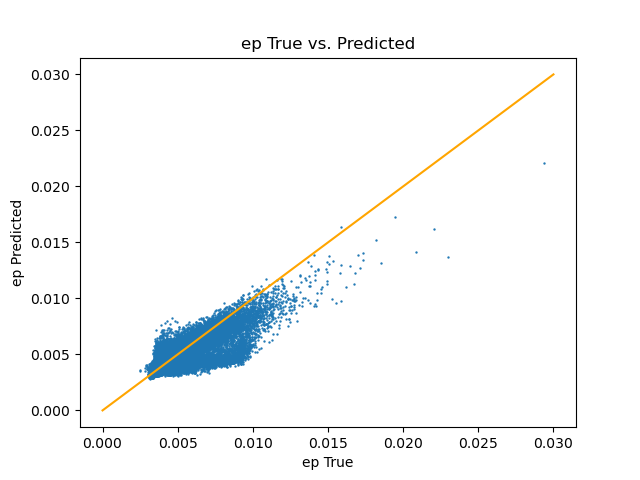

In [112]:
xes = np.arange(len(muon_df['ep']))*0.03/len(muon_df['ep'])
plt.figure()
plt.scatter(x=muon_df['ep'], y=predicted, s=0.5)
plt.plot(xes, xes, c='orange')
plt.title("ep True vs. Predicted")
plt.xlabel("ep True")
plt.ylabel("ep Predicted")
plt.show()

Reproduce the scatter plot of Fig. 1 by using the predicted values for the relative muon resolution, (σp/p)pred.

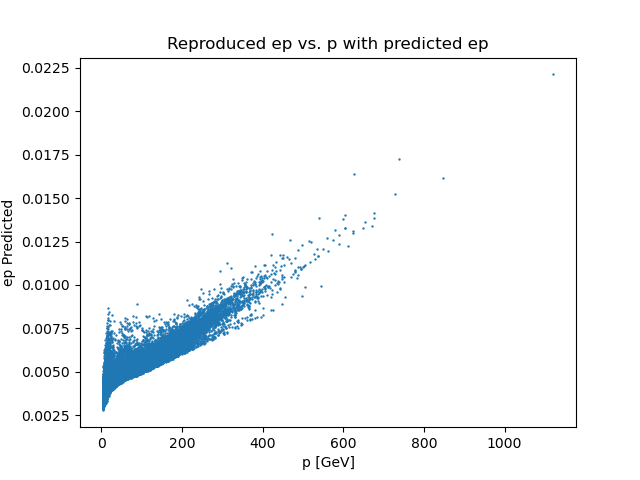

In [117]:
plt.figure()
plt.scatter(x=muon_df['p'], y=predicted, s=0.5)
plt.title("Reproduced ep vs. p with predicted ep")
plt.xlabel("p [GeV]")
plt.ylabel("ep Predicted")
plt.show()